## **Assignment1**
# London Crime Data, 2008-2016
### KMI Batch 5 Introduction Python for Data Scientis
Muhammad Reza Pahlevi <br>
ptyn-ks20

## **Import Lib**

#### NumPy (import numpy as np)
Import numpy berguna untuk komputasi numerik dan operasi pada array multidimensional. Dengan memasukkan numpy dapat memudahkan manipulasi data numerik seperti perhitungan statistik, aljabar linear, dan transformasi data.

#### Pandas (import pandas as pd)
Import pandas berguna untuk analisis dan manipulasi data tabular, terutama dalam format DataFrame. Dengan memasukkan pandas dapat memudahkan eksplorasi dan preprocessing data, seperti filter, agregasi, dan penggabungan dataset.

#### Matplotlib
Import matplotlib berguna untuk visualisasi data yang memungkinkan pembuatan berbagai jenis grafik. Dengan memasukkan matplotlib memungkinkan untuk membuat grafik garis, histogram, atau scatter plot untuk mewakili data.

#### Seaborn (import seaborn as sns)
Import seaborn berguna untuk memperindah dan menyederhanakan visualisasi data dengan palet warna yang estetis. Dengan memasukkan seaborn dapat memudahkan plot statistik yang menarik seperti heatmap atau pairplot.

#### PIL (Pillow) (from PIL import Image)
Import pillow berguna untuk manipulasi gambar, termasuk pembukaan, penyimpanan, dan pengeditan. Dengan memasukkan pillow memungkinkan untuk mengubah ukuran gambar, menggabungkan gambar, atau mengonversi format gambar.

#### Folium
import folium berguna untuk membuat peta interaktif dalam lingkungan Jupyter Notebook. Dengan memasukkan folium memungkinkan untuk menambahkan penanda lokasi, garis, atau informasi pop-up pada peta untuk eksplorasi data berbasis lokasi.

#### WordCloud (from wordcloud import WordCloud)
WordCloud adalah pustaka Python yang digunakan untuk membuat visualisasi teks yang menarik dengan menggambarkan kata-kata dalam ukuran dan warna yang berbeda sesuai dengan frekuensinya dalam teks. Dengan memasukkan WordCloud dapat membuat "word cloud" yang estetis dari teks yang diberikan, yang berguna untuk menyoroti kata-kata kunci atau visualisasi teks yang informatif.

#### Plotly Express (import plotly.express as px)
Plotly Express adalah bagian dari pustaka Plotly yang digunakan untuk membuat visualisasi data interaktif dengan mudah. Dengan memasukkan px dari Plotly Express dapat membuat berbagai jenis plot interaktif, seperti scatter plots, bar charts, line charts, dan sebagainya. Ini berguna ketika ingin membuat visualisasi data interaktiv.

#### Colorspacious (from colorspacious import cspace_converter)
Colorspacious adalah pustaka Python yang digunakan untuk mengkonversi ruang warna dalam model warna yang berbeda. Dengan memasukkan cspace_converter dari Colorspacious memungkinkan untuk mengkonversi warna dari satu ruang warna ke ruang warna lain, yang berguna ketika ingin memastikan konsistensi warna dalam visualisasi atau mengubah warna ke format yang sesuai dengan keperluan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
import folium
import plotly.express as px #biar interaktif
import plotly.graph_objects as go

from colorspacious import cspace_converter
import json

## **Reading The Data**

**CODE EXPLANATION**<br>
- *`data = 'D:\Kuliah\MSIB5\Hacktiv8\Leason\TestingGround\dataset\london_crime_by_lsoa.csv'`*<br>
Digunakan untuk membaca atau mengarahkan ke path dan file yang dituju
- *`df = pd.read_csv(data)`*<br>
Digunakan untuk membaca data dan memasukkan dataset ke variable `df`.

In [ ]:
data = 'D:\Kuliah\MSIB5\Hacktiv8\Leason\AssignmentPython1\dataset\london_crime_by_lsoa.csv'
df = pd.read_csv(data)
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## **EDA**

### **Total Tiap Jenis Kejahatan 2008-2016**

**CODE EXPLANATION**<br>
- *`mjrGroup = df.groupby('major_category')`*<br>
Syntax ini mengelompokkan data dalam DataFrame df berdasarkan kolom 'major_category' dan diisikan pada variable `mjrGroup `.
- *`mjrGroupCount = mjrGroup['value'].sum()`*<br>
Syntax ini menghitung total jumlah kejahatan ('value') dalam setiap kelompok major category.
- *`mjrGroupCountSRT = mjrGroupCount.sort_values(ascending=False)`*<br>
Syntax ini mengurutkan jumlah total kejahatan dalam mjrGroupCount secara menurun (descending) sehingga kategori dengan jumlah kejahatan tertinggi akan berada di atas.
- *`mjrMaxID = mjrGroupCount.idxmax()` & `mjrMaxCount = mjrGroupCount.max()`*<br>
Syntax ini menemukan kategori major yang memiliki jumlah kejahatan terbanyak dengan menggunakan idxmax() untuk mendapatkan indeksnya dan max() untuk mendapatkan jumlahnya. 
- *`mjrMaxID = mjrGroupCount.idxmin()` & `mjrMaxCount = mjrGroupCount.min()`*<br>
Syntax ini mirip dengan langkah sebelumnya, tetapi mencari kategori major dengan jumlah kejahatan terendah.

In [ ]:
# /category MAJOR
# group data permajor category + menjumlahkan total permajor category
mjrGroup =  df.groupby('major_category')
mjrGroupCount = mjrGroup['value'].sum()
mjrGroupCountSRT = mjrGroupCount.sort_values(ascending=False)

# cari paling banyak + crimenya
mjrMaxID = mjrGroupCount.idxmax()
mjrMaxCount = mjrGroupCount.max()

# cari paling sedikit + crimenya
mjrMaxID = mjrGroupCount.idxmin()
mjrMaxCount = mjrGroupCount.min()


print('Most crimes occur in : ', mjrMaxID, 'with crime count : ', mjrMaxCount)
print('Less crimes occur in : ', mjrMaxID, 'with crime count : ', mjrMaxCount, '\n')
print('Borough Crime Rank')
print(mjrGroupCountSRT)


Most crimes occur in :  Sexual Offences with crime count :  1273
Less crimes occur in :  Sexual Offences with crime count :  1273 

Borough Crime Rank
major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64


#### *Scater Plot Visualization*

**CODE EXPLANATION**<br>
- *`plt.figure(figsize=(10, 6))`*<br>
Syntax ini digunakan untuk membuat sebuah figur (plot) dengan ukuran 10x6 inci.
- *`plt.scatter(mjrGroupCountSRT.values, mjrGroupCountSRT.index, color='skyblue', marker='o', )`*<br>
Scatter plot dibuat dengan menggunakan plt.scatter(). Pada sumbu x, kita menggunakan .values dari mjrGroupCountSRT, yang berisi jumlah total kejahatan dalam setiap kategori major. Pada sumbu y, kita menggunakan .index dari mjrGroupCountSRT, yang berisi nama-nama kategori major. color='skyblue' mengatur warna titik-titik scatter plot menjadi biru langit, dan marker='o' mengatur tampilan titik-titiknya menjadi bulatan (circle).
- *`plt.xlabel('Total Crime Count')` & `plt.ylabel('Major Category')`*<br>
Syntax ini digunakan untuk memberi label sumbu x dan y pada plot. Sumbu x diberi label 'Total Crime Count', sedangkan sumbu y diberi label 'Major Category'.
- *`plt.title('Scatter Plot of Total Crime Count by Major Category')`*<br>
Syntax ini adalah judul dari scatter plot yang dibuat. Judulnya adalah 'Scatter Plot of Total Crime Count by Major Category'. 
- *`plt.grid(True, linestyle='--', alpha=0.6)`*<br>
Syntax ini mengatur agar grid pada plot diaktifkan (True) dengan garis-garis putus-putus (linestyle='--') dan keberadaan garis grid dengan transparansi 0.6 (alpha=0.6).


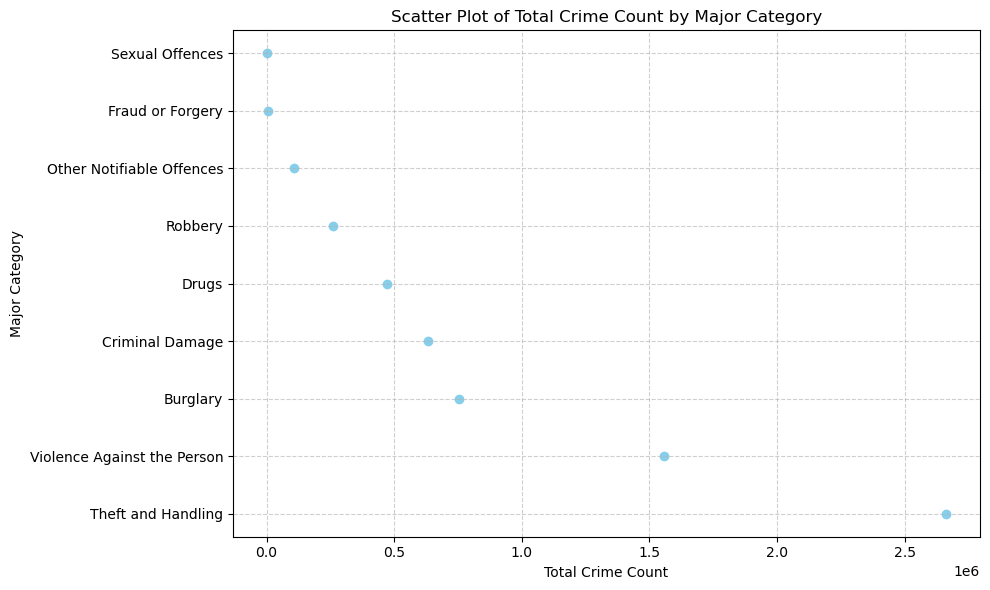

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(mjrGroupCountSRT.values, mjrGroupCountSRT.index, color='skyblue', marker='o', )
plt.xlabel('Total Crime Count')
plt.ylabel('Major Category')
plt.title('Scatter Plot of Total Crime Count by Major Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

dari visualisasi scatter plot diatas dapat dilihat bahwa distribusi pada kejahatan category major memiliki nilai paling banyak pada Theft and handling

#### *Pie Chart Time SeriesVisualization*

**CODE EXPLANATION**<br>
- *`plt.figure(figsize=(8, 8))`*
Merupakan syntax yang berguna untuk mengatur ukuran figur (gambar) untuk pie chart. Dalam hal ini, figur akan memiliki dimensi 8x8 inci.
- *`orderCHG = ['Theft and Handling', 'Sexual Offences', 'Violence Against the Person', 'Fraud or Forgery', 'Burglary','Other Notifiable Offences', 'Criminal Damage', 'Robbery', 'Drugs']`*<br>
syntax tesebut berguna untuk memberikan custom index order dikarenakan apabila di urutkan dari yang terbesar hingga terkecil beberapa value akan tertutup dikarenakan perbedaan jumlah.
- *`mjrGroupCount = mjrGroupCount.reindex(orderCHG)`*
Merupakan syntax yang berguna untuk menerapkan variable `orderCHG` pada variable `mjrGroupCount` sehingga urutannya akan mengikuti urutan pada variable `orderCHG`.
- *`plt.pie(mjrGroupCount, labels=mjrGroupCount.index, autopct='%1.1f%%', startangle=140)`*
merupakan syntax yang berfungsi untuk membuat *Pie Chart*. `mjrGroupCount` merupakan varible yang diambil valuenya, variable tersebut diam,bil dari eksplorasi data pada syntax di cell sebelumnya. `labels=mjrGroupCount.index` merupakan syntax yang berguna untuk menampilkan label pada setiap potongan *Pie Chart*. `autopct='%1.1f%%'` berguna untuk menampilkan presentase dari value variable `mjrGroupCount` dalam persen. `startangle=140` berguna untuk menentukan sudut mana dimulainya lingkaran.
- *`plt.title`*
berguna untuk memberikan label judul.
- *`plt.axis('equal') `*
merupakan syntax yang berguna untuk menyamakan aspek ratio dari pie chart, sehingga diagram lingkaran akan terlihat lebih seperti lingkaran sempurna daripada elips.

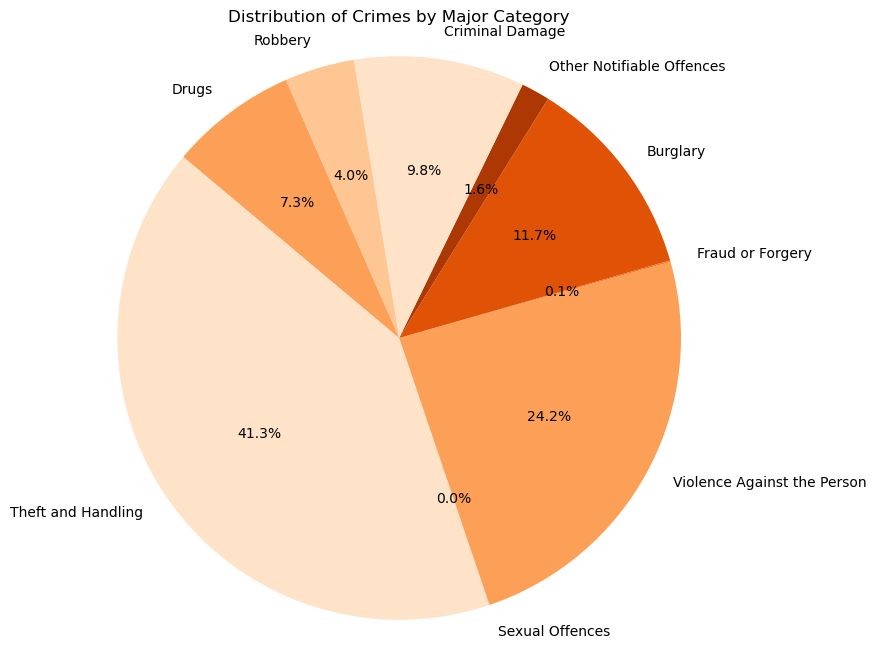

In [ ]:
plt.figure(figsize=(8, 8))
# reindex demi visisbilitas data
orderCHG = ['Theft and Handling', 'Sexual Offences', 'Violence Against the Person', 'Fraud or Forgery', 'Burglary',
            'Other Notifiable Offences', 'Criminal Damage', 'Robbery', 'Drugs']
mjrGroupCount = mjrGroupCount.reindex(orderCHG)
sns.set_palette("Oranges")
plt.pie(mjrGroupCount, labels=mjrGroupCount.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Major Category')
plt.axis('equal') 

plt.show()

dari data visualisasi pie chart diatas dapat dilihat bahwa kejahatan kategori major memiliki angka yang tinggi pada Theft and Handling sedangkan angka paling rendah ada pada kejahatan Sexsual Offences yang juga dapat dilihat bahwa rasionya sangat jauh sehingga pada pie chart di tampilkan 0,0%

### **Jumlah Kejahatan Tiap Tahun**

**CODE EXPLANATION**<br>
- Sama saja dengan kode sebelumnya hanya diganti valuenya untuk mencari jumlah kejahata tiap tahunnya

In [ ]:
# /tahun
# group data pertahun + menjumlahkan total pertahun
yearGroup = df.groupby('year')
crimeYearCount = yearGroup['value'].sum()
crimeYearCountSRT = crimeYearCount.sort_values(ascending=False)

# cari paling banyak + tahunnya
maxCrimeYear = crimeYearCount.idxmax()
maxCrimeCountYear = crimeYearCount.max()

# cari paling dikit + tahunnya
minCrimeYear = crimeYearCount.idxmin()
minCrimeCountYear = crimeYearCount.min()

# rata2/tahun
avgCrimeYear = crimeYearCount.mean()



# print
print(crimeYearCountSRT,'\n')
print('Year with the max crime :', maxCrimeYear, 'with crime count:', maxCrimeCountYear)
print('Year with the min crime :', minCrimeYear, 'with crime count:', minCrimeCountYear)
print('Crime difference        :', maxCrimeCountYear - minCrimeCountYear)
print('Average crime per year  :', avgCrimeYear)


year
2008    738641
2012    737329
2016    736121
2011    724915
2009    717214
2010    715324
2015    711624
2013    686407
2014    680183
Name: value, dtype: int64 

Year with the max crime : 2008 with crime count: 738641
Year with the min crime : 2014 with crime count: 680183
Crime difference        : 58458
Average crime per year  : 716417.5555555555


#### *Line Plot Time SeriesVisualization*

**CODE EXPLANATION**<br>
- *`figLineTsY = px.line(x =crimeYearCount.index, y =crimeYearCount)`*<br>
Merupakan syntax yang berguna untuk memasukan variabel yang sudah di olah pada eksplorasi data sebelumnya. `x =crimeYearCount.index,` berguna untuk menjadikan variable `crimeYearCount` sebagai index juga mengisi value pada *axis-x* yang berisi urutan tahun dari tahun 2008 hingga tahun 2016. `y =crimeYearCount` merupakan syntax yang berfungsi untuk memasukan variable `crimeYearCount` menjadi value yang mengisikan *axis-y* dimana ***Plotly Express*** memiliki kemampuan untuk mengenali kolom-kolom yang umum dalam DataFrame, seperti indeks (index) dan kolom nilai (value), tanpa perlu spesifikasikan dengan nama kolomnya sehingga `y` akan diinterpretasikan sebagai *axis-y* dengan nilai yang terkait dengan *axis-x*
- *`figLineTsY.update_traces(hovertemplate='Year: %{x}<br>Total Crime Count: %{y}')`*<br>
berguna untuk merubah label saat mouse hover diatas line, tdak lagi menampilak *x* dan *y* tapi diganti dengan *Year* sebagai *x* dan *Total Crime Count* sebagai *y*
- *`update_xaxes`, `update_yaxes`*<br>
berguna mengatur label pada *axsis-x* dan *axis-y*
- *`figLineTsY.update_layout(title='Total Number of Crimes Each Year in London')`*<br>
berguna untuk mengubah seluruh atau atribut -atribut dari layout. pada kode tersebut digunakan untuk memberi label judul.

In [ ]:
figLineTsY = px.line(x =crimeYearCount.index, y =crimeYearCount)
figLineTsY.update_traces(hovertemplate='Year: %{x}<br>Total Crime Count: %{y}') # rubah label hover
figLineTsY.update_xaxes(title_text='Year')
figLineTsY.update_yaxes(title_text='Total Crime Count')
figLineTsY.update_layout(title='Total Number of Crimes Each Year in London')
figLineTsY.show()


**Menggunakan Matplotlib**<br>
sama seperti menggunakan *Plotly Express*, menggunakan *Matplotlib* cenderung memiliki cara kerja yang sama.<br>
- *`plt.plot(crimeYearCount.index, crimeYearCount.values, marker='o', linestyle='-', color='b')`*<br>
`plt.plot` berguna untuk membuat ***Line Plot*** pada *Matplotlib*, `crimeYearCount.index` berguna untuk memasukan value dari variable `crimeYearCount` yang berupa tahun dan menjadikannya index pada *axis-x*. `crimeYearCount.values` berguna untuk memasukkan value dari variable `crimeYearCount` yang berupa jumlah kejahatan setiap tahunnya. `marker='o'` berguna untuk memberi titik atau bulatan pada setiap pointnya. `color='b'` berguna untuk menentukan warna garis,dan  ` linestyle='-'` berguna untuk menentukan bentuk atau style garis, taitu garis lurus.
membacannya
- *`title`, `xlabel`, `ylabel`*<br>
merupakan syntax yang berguna untuk memberi label pada judul, axis-s dan axis-y
- *`plt.tight_layout()`*<br>
Merupakan syntax untuk mengatur tata letak plot secara otomatis agar lebih rapi.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13124\1573264959.py:11: UserWarning:

The figure layout has changed to tight



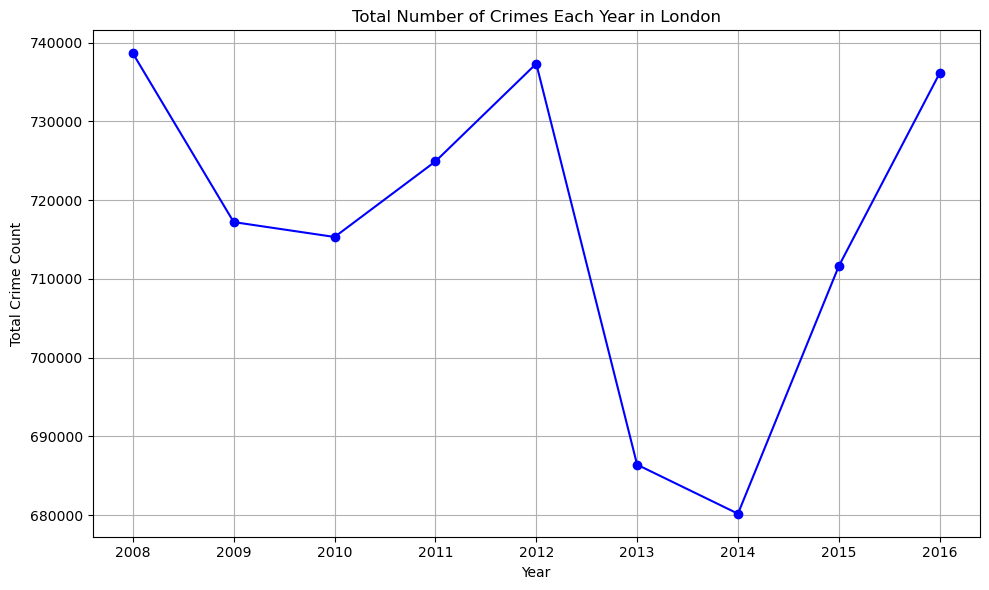

In [ ]:
# versi matplotlib
plt.figure(figsize=(10, 6))
plt.plot(crimeYearCount.index, crimeYearCount.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Number of Crimes Each Year in London')

plt.grid(True)
plt.tight_layout()
plt.tight_layout()
plt.show()

Dalam visualisasi data di atas, yang merupakan data time series, terlihat fluktuasi angka kejahatan di kota London dari tahun 2008 hingga 2014. Terdapat penurunan yang signifikan terjadi dari tahun 2012 ke 2013. akan tetapi terjadi peningkatan yang tajam dari tahun 2014 ke tahun 2016

#### *Bar Plot Visualization*

**CODE EXPLANATION**<br>
- *`sns.barplot(x=crimeYearCountSRT.index, y=crimeYearCountSRT.values, order=crimeYearCountSRT.index, palette='OrRd_r')`*<br> 
adalah sintaks yang digunakan untuk membuat ***Bar Plot***. Variabel `crimeYearCountSRT` berisi data jumlah kejahatan per tahun yang telah diolah sebelumnya selama eksplorasi data. `x=crimeYearCountSRT.index` digunakan untuk mengisi sumbu-x dengan indeks dari variabel `crimeYearCountSRT`, sementara `y=crimeYearCountSRT.values` digunakan untuk mengisi sumbu-y dengan total jumlah kejahatan per tahun. Penggunaan `order=crimeYearCountSRT.index` membantu mengurutkan data berdasarkan indeks pada `crimeYearCountSRT`, sehingga plot akan menampilkan jumlah kejahatan dari yang paling besar hingga yang paling kecil. Terakhir, `palette='OrRd_r` digunakan untuk menentukan skema warna pada plot bar.
- *`plt.xticks(rotation=75)`*<br
syntax tersebut berguna untuk memutar tulisan index sebanyak 75 derajat sehingga tidak bertabrakan dan memudahkan dalam membacannya
- *`title`, `xlabel`, `ylabel`*<br>
merupakan syntax yang berguna untuk memberi label pada judul, axis-s dan axis-y
- *`plt.tight_layout()`*<br>
Merupakan syntax untuk mengatur tata letak plot secara otomatis agar lebih rapi.

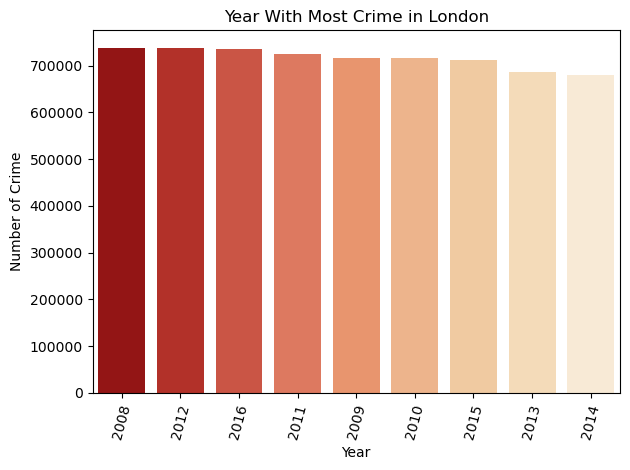

In [ ]:
sns.barplot(x =crimeYearCountSRT.index, y =crimeYearCountSRT.values, order =crimeYearCountSRT.index, palette='OrRd_r')
plt.xticks(rotation=75)
plt.title('Year With Most Crime in London')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.tight_layout()

Dapat dilihat dari visualisasi data di atas bahwa tahun 2008 merupakan tahun dengan tingkat kejahatan paling tinggi, mencapai lebih dari 700.000 kejahatan yang terjadi. Sementara itu, pada tahun 2014, tercatat tingkat kejahatan terendah, dengan angka di bawah 70.000.

Berdasarkan eksplorasi data sebelumnya, dapat diketahui secara detail bahwa pada tahun 2008 kejahatan di London mencapai angka 738.641, sedangkan jumlah terendah terjadi pada tahun 2014 dengan angka kejahatan sebanyak 680.183. Terdapat perbedaan yang cukup signifikan antara tahun 2008 dan 2014, yaitu terdapat selisih sekitar 58.458 dengan angka kejahatan pertahunnya mencapai rata-rata sekitar 716.417,5555555555.

### **Jumlah Kejahatan Tiap Bulan**

**CODE EXPLANATION**<br>
- sama dengan kode sebelumnya hanya saja value group diganti menggunakan value month

In [ ]:
# /bulan
# group data perbulan + menjumlahkan total perbulan
monthGroup = df.groupby('month')
crimemonthCount = monthGroup['value'].sum()
crimemonthCountSRT = crimemonthCount.sort_values(ascending=False)

# cari paling banyak + bulannya
maxCrimemonth = crimemonthCount.idxmax()
maxCrimeCountmonth = crimemonthCount.max()

# cari paling dikit + bulannya
minCrimemonth = crimemonthCount.idxmin()
minCrimeCountmonth = crimemonthCount.min()

# rata2/bulan
avgCrimemonth = crimemonthCount.mean()



# print
print(crimemonthCountSRT,'\n')
print('month with the max crime :', maxCrimemonth, 'with crime count:', maxCrimeCountmonth)
print('month with the min crime :', minCrimemonth, 'with crime count:', minCrimeCountmonth)
print('Crime difference        :', maxCrimeCountmonth - minCrimeCountmonth)
print('Average crime per month  :', avgCrimemonth)


month
7     563076
10    558252
5     552704
3     551795
11    549671
6     549041
8     532784
1     530247
9     522377
4     520648
12    516626
2     500537
Name: value, dtype: int64 

month with the max crime : 7 with crime count: 563076
month with the min crime : 2 with crime count: 500537
Crime difference        : 62539
Average crime per month  : 537313.1666666666


#### *Histogram Visualization*

**CODE EXPLANATION**<br>
- *`plt.hist(crimemonthCount.index, bins=12, edgecolor='k', weights=crimemonthCount.values)`*<br>
`crimemonthCount.index` digunakan sebagai data yang akan diplot pada sumbu x. Di sini, crimemonthCount adalah sebuah Series yang berisi jumlah total kejahatan per bulan, dan .index mengandung bulan-bulan sebagai label. `bins=12` mengatur jumlah bin (batang) pada histogram. Dalam hal ini, terdapat 12 bin untuk mewakili setiap bulan. `edgecolor='k'` mengatur warna tepi batang-batang histogram menjadi hitam.`weights=crimemonthCount.values` digunakan untuk memberikan bobot pada masing-masing bin sesuai dengan jumlah kejahatan yang terjadi pada bulan tersebut.
- *`plt.xlabel('Year')` & `plt.ylabel('Total Crime Count')`*<br>
`plt.xlabel('Year')` digunakan untuk memberi label sumbu x, yang dalam konteks ini adalah tahun (bulan tidak digunakan karena telah diwakili oleh jumlah bin).`plt.ylabel('Total Crime Count')` digunakan untuk memberi label sumbu y, yang adalah jumlah total kejahatan.
- *`plt.title('Histogram of Total Crime Counts per Month')`*<br>
Syntax ini adalah judul dari histogram yang dibuat. Judulnya adalah 'Histogram of Total Crime Counts per Month'.
- *`plt.xticks(rotation=90)`*<br>
plt.xticks(rotation=90) digunakan untuk memutar label pada sumbu x sebesar 90 derajat.

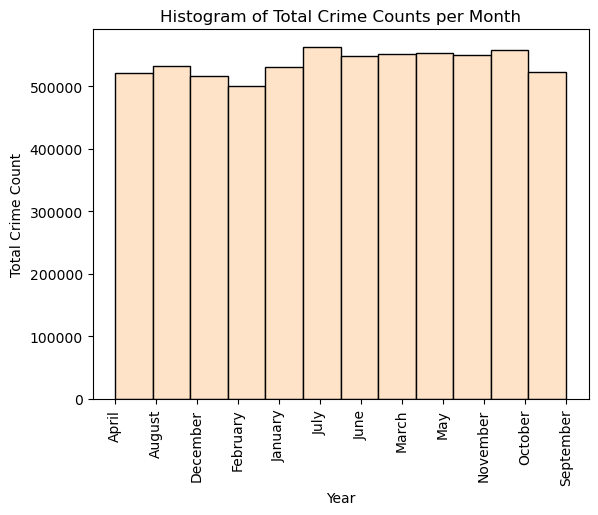

In [ ]:
plt.hist(crimemonthCount.index, bins=12, edgecolor='k', weights=crimemonthCount.values)
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Histogram of Total Crime Counts per Month')
plt.xticks(rotation=90)
plt.show()


dapat dilihat pada visualisasi data jumlah kejahatan tiap bulannya dari tahun 2008 hingga 2016 terdistribusi cukup rata. dengan july menempati peringkat pertama dengan jumlah kejahatan terbanyak, sdangkan bulan dengan kejahatan terendah ada pada bulan february.

#### *Area Plot Visualization*

**CODE EXPLANATION**<br>
- *`plt.fill_between(crimemonthCount.index, crimemonthCount.values, alpha=0.7)`*<br>
syntax tersebut berfungsi untuk membuat area plot dengan `crimemonthCount.index` yang mengambil value yang akan dijadikan index berupa bulan, dan `crimemonthCount.values` yang mengambil value dari total kejahatan perbulan yang sudah ada pada variable `crimemonthCount` sebagai value atau weight.
- *`plt.xlabel('Year')` & `plt.ylabel('Total Crime Count')`*<br>
syntax tersebut berguna untuk mengubah index x-axsis menjadi bulan string yang tadinya angka.

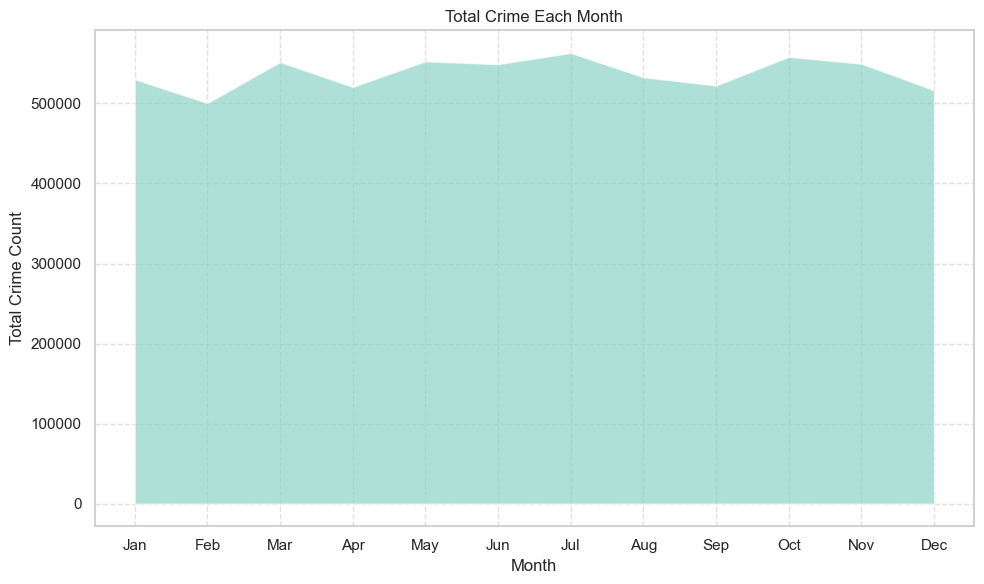

In [ ]:
plt.figure(figsize=(10, 6))
plt.fill_between(crimemonthCount.index, crimemonthCount.values, alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Each Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(crimemonthCount.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

dapat dilihat dari visualisasi area plot diatas bahwa peningkatan kejahatan selalu terjadi pada saat menuju bulan dengan kejadian tertentu, seperti pada jumlah februari dan maret, dimana maret merupakan awal musim semi, september ke oktober yang merupakan awal musim dingin.

### **Jumlah Kejahatan Setiap Bulan di Tiap Tahun**

**CODE EXPLANATION**<br>
- sama dengan kode sebelumnya hanya saja value group diganti menggunakan value year dan month sehingga dikelompokkan berdasarkan bulan dan tahun

In [ ]:
mtYrGroup = df.groupby(['year', 'month'])
mtYrGroupCount = mtYrGroup['value'].sum()
mtYrGroupCountSRT = mtYrGroupCount.sort_index(ascending=False)

maxMtYrGroupID =mtYrGroupCount.idxmax()
maxMtYrGroupCn =mtYrGroupCount.max()

minMtYrGroupID =mtYrGroupCount.idxmin()
minMtYrGroupCn =mtYrGroupCount.min()


print('Most crimes occur in : ', maxMtYrGroupID, 'with crime count : ', maxMtYrGroupCn)
print('Less crimes occur in : ', minMtYrGroupID, 'with crime count : ', minMtYrGroupCn)
len(mtYrGroupCountSRT)


Most crimes occur in :  (2012, 'March') with crime count :  67537
Less crimes occur in :  (2014, 'February') with crime count :  51222


108

**CODE EXPLANATION**<br>
- *`mtYrGroupCountTS = mtYrGroupCount.reset_index()`*<br>
Syntaxx ini berfungsi  mengatur ulang indeks dari DataFrame mtYrGroupCount yang berisi hasil perhitungan jumlah kejahatan per tahun dan bulan. Dengan melakukan ini, indeks asli DataFrame akan diganti oleh indeks berurutan.
- *`mtYrGroupCountTS['date'] = pd.to_datetime(mtYrGroupCountTS['year'].astype(str) + '/' + mtYrGroupCountTS['month'], format='%Y/%B')`*<br>
Syntax ini berguna untuk membuat columns dengan nama `'date'`, bertujuan untuk menyimpan data dalam format tanggal yang lebih mudah diinterpretasikan daripada hanya menggunakan kolom 'year' (tahun) dan 'month' (bulan). `pd.to_datetime` adalah fungsi dari pustaka Pandas yang digunakan untuk mengonversi data menjadi format tanggal. Dalam fungsi ini, Anda melakukan konversi dengan menggabungkan nilai dari kolom 'year' dan 'month' dari DataFrame, yang digabungkan dalam format string dengan garis miring ('/') di antara tahun dan bulan. Argumen format='%Y/%B' menentukan cara Pandas harus menginterpretasikan format tanggal yang baru dibuat, di mana %Y mengindikasikan tahun dan %B mengindikasikan nama bulan.
- *`mtYrGroupCountTS = mtYrGroupCountTS[['date', 'value']]`*<br>
Syntax ini berguna untuk melakukan grouping dua kolom, yaitu 'date' dan 'value'. Kolom lain yang tidak diperlukan dibuang. Hal ini mengurangi kompleksitas DataFrame dan memudahkan untuk fokus pada data yang penting.
- *`mtYrGroupCountTS = mtYrGroupCountTS.sort_values('date')`*<br>
DataFrame mtYrGroupCountTS diurutkan berdasarkan kolom 'date' secara berurutan. Ini membantu dalam menampilkan data kejahatan berdasarkan tanggal yang berurutan dari awal hingga akhir periode yang ada dalam data.
- *`print(mtYrGroupCountTS['date'].tail(10))`*<br>
Pada syntax ini tanggal-tanggal terakhir (10 tanggal terakhir) dalam DataFrame yang telah diurutkan dicetak ke layar. 
- *`mtYrGroupCountTSMean = mtYrGroupCountTS['value'].mean()`*<br>
 Rata-rata dari kolom 'value' (jumlah kejahatan) dihitung.

In [ ]:
mtYrGroupCountTS = mtYrGroupCount.reset_index()
mtYrGroupCountTS['date'] = pd.to_datetime(mtYrGroupCountTS['year'].astype(str) + '/' + mtYrGroupCountTS['month'], format='%Y/%B')
mtYrGroupCountTS = mtYrGroupCountTS[['date', 'value']]

mtYrGroupCountTS = mtYrGroupCountTS.sort_values('date')
print(mtYrGroupCountTS['date'].tail(10))
mtYrGroupCountTSMean = mtYrGroupCountTS['value'].mean()

103   2016-03-01
96    2016-04-01
104   2016-05-01
102   2016-06-01
101   2016-07-01
97    2016-08-01
107   2016-09-01
106   2016-10-01
105   2016-11-01
98    2016-12-01
Name: date, dtype: datetime64[ns]


#### *Heat Map Visualization*

**CODE EXPLANATION**<br>
- *`mtYrGroupCountHM = df.pivot_table(index='year', columns='month', values='value', aggfunc='sum')`*<br>
Syntaxx ini berfungsi  menggunakan fungsi pivot_table dari pustaka Pandas untuk membuat tabel pivot dari DataFrame df. Tabel pivot adalah cara yang berguna untuk merangkum dan mengubah struktur data. `index='year'` berguna untuk menjadikan column year sebagai index , `columns='month` berguna untuk menajadikan column month sebagai column yang akan digunakan pada heatmap dan `values='value` berguna untuk menunjukkan bahwa data yang akan dihitung adalah kolom `'value'`. `aggfunc='sum'` menunjukan bahwa heatmap menghitung jumlah kejahatan.
- *`sns.heatmap(mtYrGroupCountHM, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)`*<br>
Syntax ini berguna untuk membuat heatmap dengan data yang sudah ditentukan sebelumnya. `annot=True` untuk menunjukan angka didalam kotak heatmap. 
- *`plt.title('Crime Counts by Month and Year')` & `plt.xlabel('Month')` & `plt.ylabel('Year')`*<br>
Syntax ini berguna untuk memberikan judul dan label pada heatmap.

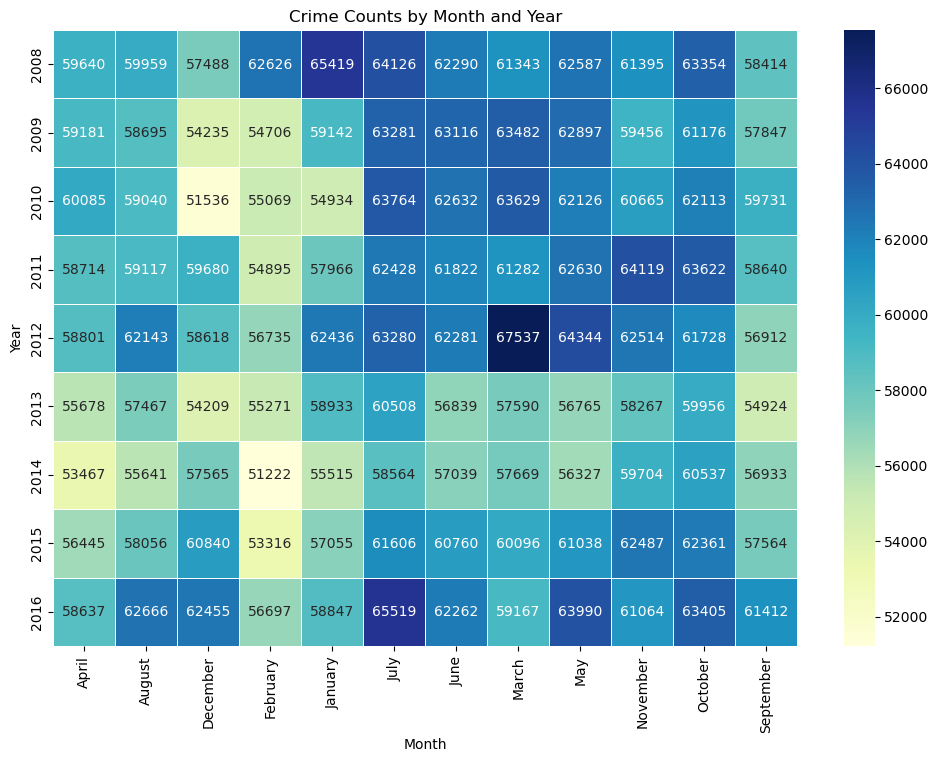

In [ ]:
mtYrGroupCountHM = df.pivot_table(index='year', columns='month', values='value', aggfunc='sum')

# Buat bikin heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mtYrGroupCountHM, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Crime Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

dari visualisasi data diatas di berikan kode warna untuk menunjukkan tingkat kejahatan tiap bulan di setiap tahun, dapat di lihat kejahatan yang paling banyak terjadi di bulan maret 2012 kemudian nomor 2 di bulan jully 2016, dan yang ketiga merupakan january 2008

#### *Line Plot Time Series Visualization*

**CODE EXPLANATION**<br>
- *`plt.plot(mtYrGroupCountTS['date'], mtYrGroupCountTS['value'], marker='o', linestyle='-', color='b', markersize=3.5, markerfacecolor='r')`*<br>
Syntaxx ini berfungsi untuk membuat time series line plot yang berisi mengenai jumlah kejahatan pada tiap bulan dari tahun 2008 hingga 2016. `mtYrGroupCountTS['date']` menujukkan sumbu x yang mengambil data bulan. `mtYrGroupCountTS['value']` merupakan syntax untuk mengambil value jumlah kejahatan tiap bulannya. `marker='o'` menunjukkan bahwa titik data akan ditandai dengan simbol lingkaran ('o'). `linestyle='-'` mengatur gaya garis menjadi garis solid. `color='b'` mengatur warna garis menjadi biru ('b'). `markersize=3.5` mengatur ukuran marker (titik data) menjadi 3.5. `markerfacecolor='r'`  mengatur  agar titik jadi merah.
- sisa syntax hanya berguna untu memberikan label.

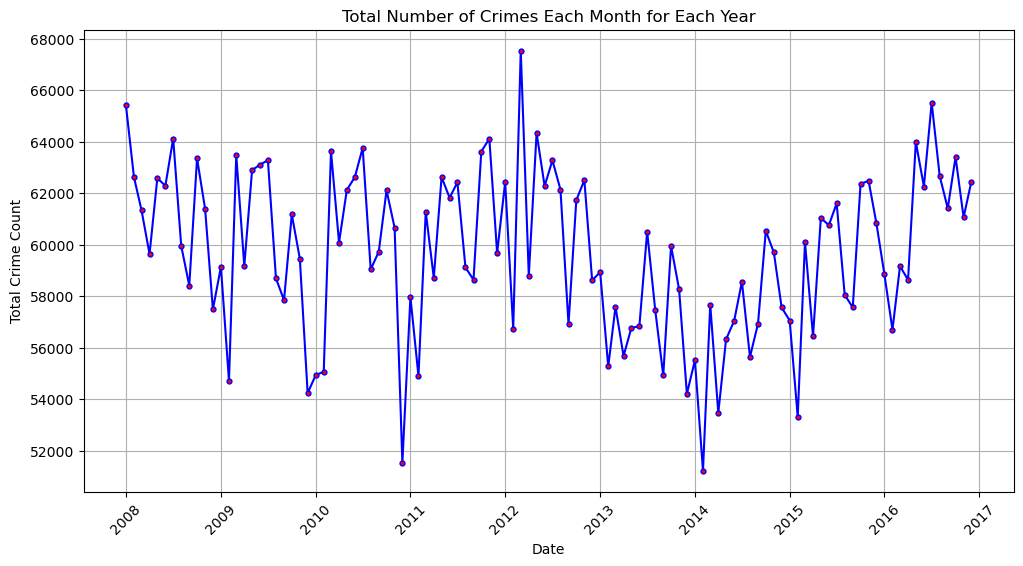

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mtYrGroupCountTS['date'], mtYrGroupCountTS['value'], marker='o', linestyle='-', color='b', markersize = 3.5, markerfacecolor = 'r')
plt.title('Total Number of Crimes Each Month for Each Year')
plt.xlabel('Date')
plt.ylabel('Total Crime Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

dapat dilihat dari visualisasi time series diatas bahwa sekitar december 2010 dan 2014 memiliki jumlah kejahatan yang rendah, dengan penurunan paling signifikan dari november 2010 ke december 2010. secara garis garis besar terjadi penurunan berkala dari maret 2012 hingga february 2014 lalu terjadi peningkatan berkala hingga july 2016.

### **Jumlah Kejahatan Tahunan di Tiap Borough**

**CODE EXPLANATION**<br>
- *`df.pivot_table(index='year', columns='borough', values='value', aggfunc='sum')`*<br>
syntax ini berguna untuk membuat data frame dengan index berupa tahun dan columnnya merupakan borough juga dengan value berupa jumlah value pada dari kolom value pada data frame df.

In [ ]:
boroughYearlyData = df.pivot_table(index='year', columns='borough', values='value', aggfunc='sum')
boroughYearlyData

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


#### *Box Plot Visualization*

**CODE EXPLANATION**<br>
- *`sns.boxplot(data=boroughYearlyData, orient='h', palette='Set3')`*<br>
syntax ini berguna untuk membuat box plot menggunakan seaborn dengan mengambil data dari dataframe `boroughYearlyData`. serta dengan orientasi horizontal.
- *`plt.grid(axis='x', linestyle='--', alpha=0.6)`*<br>
syntax ini berguna untuk menambahkan garis putus putus pada axis-x.


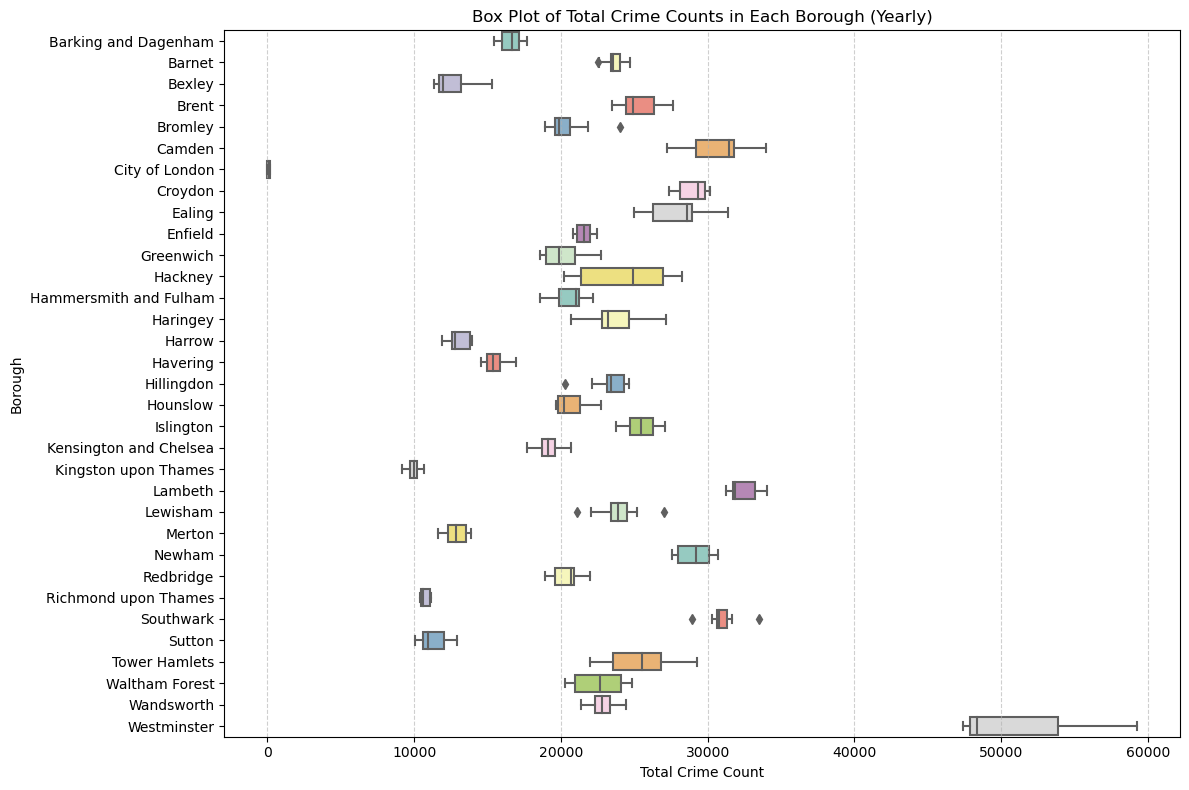

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=boroughYearlyData, orient='h', palette='Set3')
plt.xlabel('Total Crime Count')
plt.ylabel('Borough')
plt.title('Box Plot of Total Crime Counts in Each Borough (Yearly)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Dapat dilihat dari visualisasi box plot diatas mengenai persebaran jumlah kejahatan pertahun tiap boroughnya. City of London memiliki jumlah kejahatan paling rendah juga persebaran data yang sangat kecil hal ini mengartikan bahwa City of london memiliki jumlah kejahatan yang  kecil dari tahun 2008 hingga 2016. sedangkan pada Westminister memiliki kejahatan yang sangat tinggi, persebaran data cukup luas untuk 9 key index, dengan whisker atas yang cukup panjang, hal ini menandakan pada tahun tertentu memiliki jumlah kejahatan yang sangat tinggi, hal ini juga dengan jarak Q2 dan Q3 pada IQR yang panjang, hal ini juga didukung dengan bentuknya yang positif skewed. Kensington and Chelsea memiliki persebaran data yang jumlah kejahatan dari 2008 hingga 2016 yang baik atau imbang ditandai Q2 yang berada di tengah IQR.

### **Jumlah Kejahatan Bulanan di Tiap Borough**

 #### <font color='red'> ***Dikarenakan semua `project rubric` sudah terpenuhi maka visualisasi selanjtnya akan menggunakan `Plotly Express` dan tidak menggunakan `MatplotLib` sehingga menjadi interaktiv dan mudah dalam membaca data***

**CODE EXPLANATION**<br>
- *`df.pivot_table(index='month', columns='borough', values='value', aggfunc='sum')`*<br>
syntax ini berguna untuk membuat data frame dengan index berupa bulan dan columnnya merupakan borough juga dengan value berupa jumlah value pada dari kolom value pada data frame df.

In [ ]:
crBrMn = df.pivot_table(index='month', columns='borough', values='value', aggfunc='sum')
crBrMn

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661
6,12451,17908,9492,19342,15159,23514,52,22376,21753,16683,...,9915,21967,15195,8375,24205,8822,19848,17962,17687,37216
7,13205,18297,9805,19698,16164,24133,53,22629,22557,16628,...,10205,22758,15517,8498,24553,8557,21406,17927,18387,40293
8,12315,16775,9063,18478,14703,21900,75,21623,20806,15445,...,9259,21683,14410,7911,23847,7933,19589,16939,16765,38090
9,11883,16902,9053,18184,14616,21731,90,21255,20249,15447,...,9274,21345,14725,8231,22926,8050,19040,16619,17306,35608


**CODE EXPLANATION**<br>
- *`fig = px.box(crBrMn, orientation='h', labels={'value': 'Total Crime Count'}`*<br>
syntax ini berguna untuk membuat box plot menggunakan `Plotly Express` yang mengambil data dari variable atau dataframe `crBrMn`.


In [ ]:
fig = px.box(crBrMn, orientation='h', labels={'value': 'Total Crime Count'},
             title='Box Plot of Total Crime Counts in Each Borough (Monthly)')
fig.update_layout(legend_title_text='Borough')
fig.show()


dari box plot diatas dapat dilihat bahwa persebaran data westminister tiap bulannya cenderung normal walau whisker masih cenderung lebih panjang pada minimum yang berarti variable bervariasi pada Q1 dengan min yang agak jauh dari IQR

**CODE EXPLANATION**<br>
- *`px.line(crBrMn, x=crBrMn.index, y=crBrMn.columns,`*<br>
syntax ini berguna untuk membuat line plot menggunakan `Plotly Express` yang mengambil data dari variable atau dataframe `crBrMn`. dan menjadikan index dari variable `crBrMn` sebagai axsis-x dan columnnya sebagai axis-y


In [ ]:
fig = px.line(crBrMn, x=crBrMn.index, y=crBrMn.columns, labels={'index': 'Month', 'value': 'Total Crime Count'},
              title='Total Crime in Each Borough Monthly')
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_layout(legend_title_text='Borough')
fig.show()


digunakan untuk membantu check dan melihat variasi data di box plot, outliner maksimum pada Keningston and chelsea cukup tinggi

### **Jumlah Kejahatan Berdasarkan Wilayah**

In [ ]:
boGroup = df.groupby(['borough'])
boGroupCount = boGroup['value'].sum()
boGroupCountSRT = boGroupCount.sort_index(ascending=False)
boGroupCountSRT

borough
Westminster               455028
Wandsworth                204741
Waltham Forest            203879
Tower Hamlets             228613
Sutton                    100987
Southwark                 278809
Richmond upon Thames       96771
Redbridge                 183562
Newham                    262024
Merton                    115654
Lewisham                  215137
Lambeth                   292178
Kingston upon Thames       89306
Kensington and Chelsea    171981
Islington                 230286
Hounslow                  186772
Hillingdon                209680
Havering                  138947
Harrow                    116848
Haringey                  213272
Hammersmith and Fulham    185259
Hackney                   217119
Greenwich                 181568
Enfield                   193880
Ealing                    251562
Croydon                   260294
City of London               780
Camden                    275147
Bromley                   184349
Brent                     227551
Be

In [ ]:
fig = px.bar(x=boGroupCountSRT.values, y=boGroupCountSRT.index, labels={'x': 'Borough', 'y': 'Total Crime Count'},
             title='Total Crime Count by Borough')
fig.update_yaxes(categoryorder='total ascending')
fig.show()

### **Jumlah Kejahatan pada Setiap Kategori di Setiap Daerah**

In [ ]:
crBrMjrGr = df.groupby(['borough', 'major_category'])
crBrMjrCo = crBrMjrGr['value'].sum().reset_index()
crBrMjrCo


,borough,major_category,value
0,Barking and Dagenham,Burglary,18103
1,Barking and Dagenham,Criminal Damage,18888
2,Barking and Dagenham,Drugs,9188
3,Barking and Dagenham,Fraud or Forgery,205
4,Barking and Dagenham,Other Notifiable Offences,2819
...,...,...,...
290,Westminster,Other Notifiable Offences,6148
291,Westminster,Robbery,15752
292,Westminster,Sexual Offences,59
293,Westminster,Theft and Handling,277617


In [ ]:
crBrMjrCoTb = crBrMjrCo.pivot_table(index='borough', columns='major_category', values='value', fill_value=0)
fig = px.bar(crBrMjrCoTb, x=crBrMjrCoTb.index, y=crBrMjrCoTb.columns, title='Total Crime Count by Borough',
             labels={'value': 'Total Crime Count'}, category_orders={"borough": crBrMjrCo["borough"].tolist()})
fig.update_xaxes(categoryorder='total ascending')
fig.show()

### **Jumlah Kejahatan pada Borough Dengan Kejahatan Paling Banyak dan Paling Sedikit Pada Tahun 2008 dan 20014, di Bulan July dan February**

**CODE EXPLANATION**<br>
- kode ini berguna untuk melakukan filter pada data, terbatas pada borough westminister, tahun 2008 dan 2014, bulan july dan february. yang kemudia diambil valuenya berdasarkan nilai yang ada pada tiap column major_category.


In [ ]:
WestminF708 = df[(df['borough'] == 'Westminster') & (df['year'] == 2008) & (df['month'] == 7)] 
WestminF714 = df[(df['borough'] == 'Westminster') & (df['year'] == 2014) & (df['month'] == 7)]
WestminF208 = df[(df['borough'] == 'Westminster') & (df['year'] == 2008) & (df['month'] == 2)] 
WestminF214 = df[(df['borough'] == 'Westminster') & (df['year'] == 2014) & (df['month'] == 2)]

WestminF708Co = WestminF708.groupby('major_category', as_index=False)['value'].sum()
WestminF714Co = WestminF714.groupby('major_category', as_index=False)['value'].sum()
WestminF208Co = WestminF208.groupby('major_category', as_index=False)['value'].sum()
WestminF214co = WestminF214.groupby('major_category', as_index=False)['value'].sum()

**CODE EXPLANATION**<br>
- *`fig = go.Figure()`*<br>
syntax tersebut berguna untuk membuat gambar kosong pada plotly.
- *`fig.add_trace(go.Bar(x=WestminF708Co['major_category'], y = WestminF708Co['value'],`*<br>
syntax berikut berguna untuk menambahkan trace pada gambar berupa bar. x disi dengan index majopr category dan y diisi dengan value dari sum major category. name dan color berguna untuk memberi text dan warna.
- *`fig.update_layout()`*<br>
berguna untuk mengatrur layout gambar.


In [ ]:


fig = go.Figure()
fig.add_trace(go.Bar(x=WestminF708Co['major_category'], y = WestminF708Co['value'],
                   name='July 2008', marker_color='rgb(122, 35, 56)'))
fig.add_trace(go.Bar(x=WestminF714Co['major_category'], y = WestminF714Co['value'],
                   name='July 2014', marker_color='rgb(143, 210, 75)'))
fig.add_trace(go.Bar(x=WestminF208Co['major_category'], y = WestminF208['value'],
                   name='February 2008', marker_color='rgb(114,128,255)'))
fig.add_trace(go.Bar(x=WestminF214co['major_category'], y = WestminF214co['value'],
                   name='February 2014', marker_color='rgb(248,160,97)'))

fig.update_layout(
    title='Crime Count Westminister',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Crime Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.0 
)
fig.show()

pada bulan february 2008 sedikit janggal, bahkan dengan kota dengan kejahatan paling tinggi bebiliki angka yang sedikit.

**CODE EXPLANATION**<br>
- kode ini berguna untuk melakukan filter pada data, terbatas pada borough City of London, tahun 2008 dan 2014, bulan july dan february. yang kemudia diambil valuenya berdasarkan nilai yang ada pada tiap column major_category.


In [ ]:
CiOLF708 = df[(df['borough'] == 'City of London') & (df['year'] == 2008) & (df['month'] == 7)]
CiOLF714 = df[(df['borough'] == 'City of London') & (df['year'] == 2014) & (df['month'] == 7)]
CiOLF208 = df[(df['borough'] == 'City of London') & (df['year'] == 2008) & (df['month'] == 2)]
CiOLF214 = df[(df['borough'] == 'City of London') & (df['year'] == 2014) & (df['month'] == 2)]

CiOLF708Co = CiOLF708.groupby('major_category', as_index=False)['value'].sum()
CiOLF714Co = CiOLF714.groupby('major_category', as_index=False)['value'].sum()
CiOLF208Co = CiOLF208.groupby('major_category', as_index=False)['value'].sum()
CiOLF214co = CiOLF214.groupby('major_category', as_index=False)['value'].sum()


**CODE EXPLANATION**<br>
- *`fig = go.Figure()`*<br>
syntax tersebut berguna untuk membuat gambar kosong pada plotly.
- *`fig.add_trace(go.Bar(x=WestminF708Co['major_category'], y = WestminF708Co['value'],`*<br>
syntax berikut berguna untuk menambahkan trace pada gambar berupa bar. x disi dengan index majopr category dan y diisi dengan value dari sum major category. name dan color berguna untuk memberi text dan warna.
- *`fig.update_layout()`*<br>
berguna untuk mengatrur layout gambar.


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=CiOLF708Co['major_category'], y = CiOLF708Co['value'],
                   name='July 2008', marker_color='rgb(122, 35, 56)'))
fig.add_trace(go.Bar(x=CiOLF714Co['major_category'], y = CiOLF714Co['value'],
                   name='July 2014', marker_color='rgb(143, 210, 75)'))
fig.add_trace(go.Bar(x=CiOLF208Co['major_category'], y = CiOLF208['value'],
                   name='February 2008', marker_color='rgb(114,128,255)'))
fig.add_trace(go.Bar(x=CiOLF214co['major_category'], y = CiOLF214co['value'],
                   name='February 2014', marker_color='rgb(248,160,97)'))

fig.update_layout(
    title='Crime Count City of London',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Crime Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.25, # gap between bars of adjacent location coordinates.
    bargroupgap=0.0 # gap between bars of the same location coordinate.
)
fig.show()

### **Word Cloud**

**CODE EXPLANATION**<br>
- kode ini sama seperti kode sebelumnya

In [ ]:
crBoroughGroup = df.groupby('borough')
crBoroughGroupCount = crBoroughGroup['value'].sum()
crBoroughGroupCountSRT = crBoroughGroupCount.sort_values(ascending=False)

maxCrBrCoID = crBoroughGroupCount.idxmax()
maxCrBrCo = crBoroughGroupCount.max()

minCrBrCoID = crBoroughGroupCount.idxmin()
minCrBrCo = crBoroughGroupCount.min()

print(crBoroughGroupCountSRT)
print('Most crimes occur in : ', maxCrBrCoID, 'with crime count : ', maxCrBrCo)
print('Less crimes occur in : ', minCrBrCoID, 'with crime count : ', minCrBrCo, '\n')

borough
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Ri

**CODE EXPLANATION**
- *`crBoCoWC = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(crBoroughGroupCountSRT)`*<br>
syntax berikut berguna untuk membuat wordcloud dengan parameter lebar 400 pixel dan tinggi 200pixel, backgroud putih. `.generate_from_frequencies(crBoroughGroupCountSRT)` berguna untuk Menghasilkan representasi WordCloud berdasarkan frekuensi kota atau wilayah dengan jumlah kejahatan tertinggi hingga terendah. Diambil dari variable `crBoroughGroupCountSRT`.
- sesa kode berisi untuk mengatur layout seperti biasannya menggunakan matplotlib

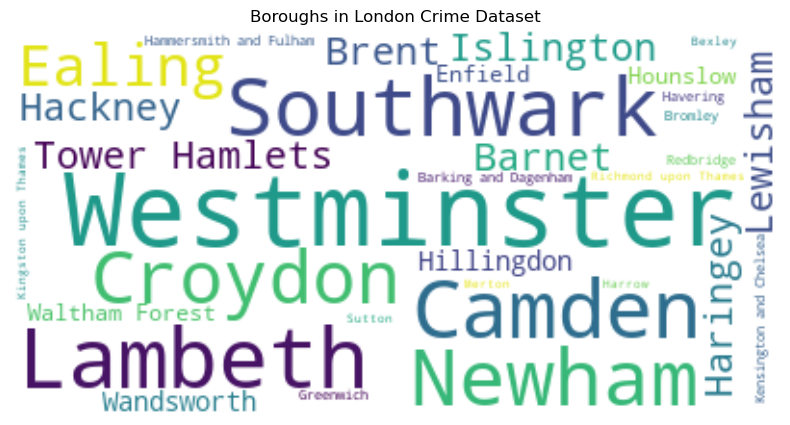

In [ ]:
crBoCoWC = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(crBoroughGroupCountSRT)


plt.figure(figsize=(10, 5))
plt.imshow(crBoCoWC, interpolation='bilinear')
plt.axis('off') # matiin garis axis
plt.title('Boroughs in London Crime Dataset')
plt.show()

In [ ]:
londonMask = np.array(Image.open("D:\Kuliah\MSIB5\Hacktiv8\Leason\AssignmentPython1\pictWC\London.png"))
print(londonMask.shape, '\n', londonMask.ndim, '\n', type(londonMask))

(1024, 1024, 3) 
 3 
 <class 'numpy.ndarray'>


**CODE EXPLANATION**
- *`londonMask = np.array(Image.open("D:\Kuliah\MSIB5\Hacktiv8\Leason\AssignmentPython1\pictWC\London.png"))`*<br>
Berguna untuk membuka gambar dan mengconvertnya menjadi array.
- *`londonMask.ndim`*<br>
berguna untuk melakukan cek dimensi gambar.

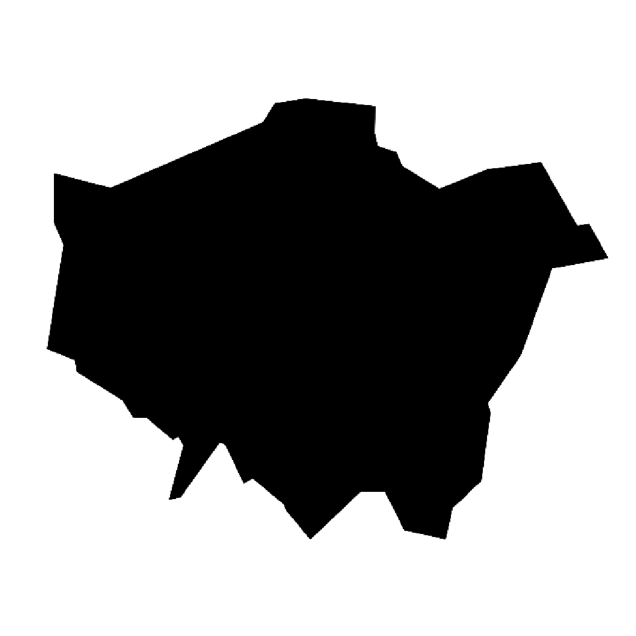

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.imshow(londonMask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

**CODE EXPLANATION**
- sama seperti kode diatas cumanditambahkan fungsi mask agar membentuk seperti gambar mask

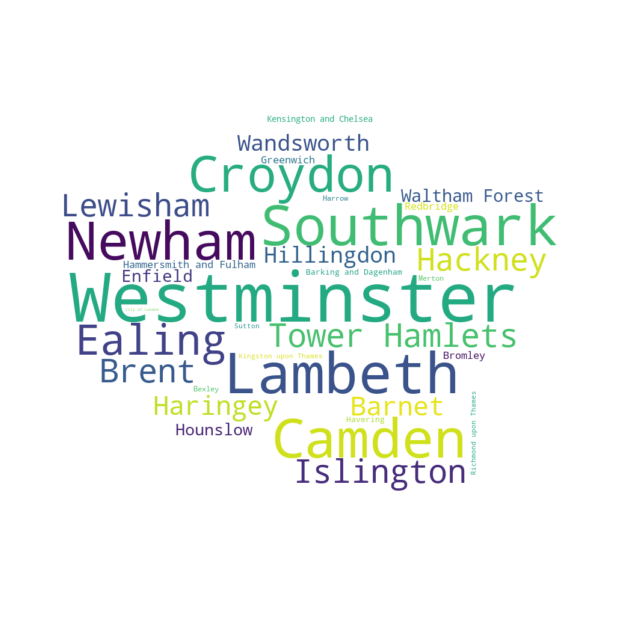

In [ ]:
londonMask01WC = WordCloud(background_color='white', mask=londonMask).generate_from_frequencies(crBoroughGroupCountSRT)

fig = plt.figure(figsize=(8, 8))

plt.imshow(londonMask01WC, interpolation="bilinear")
plt.axis("off")
plt.show()
# kurang cakep soalnya dikit katanya  ┻━┻︵╰( •̀ε•́ ╰)

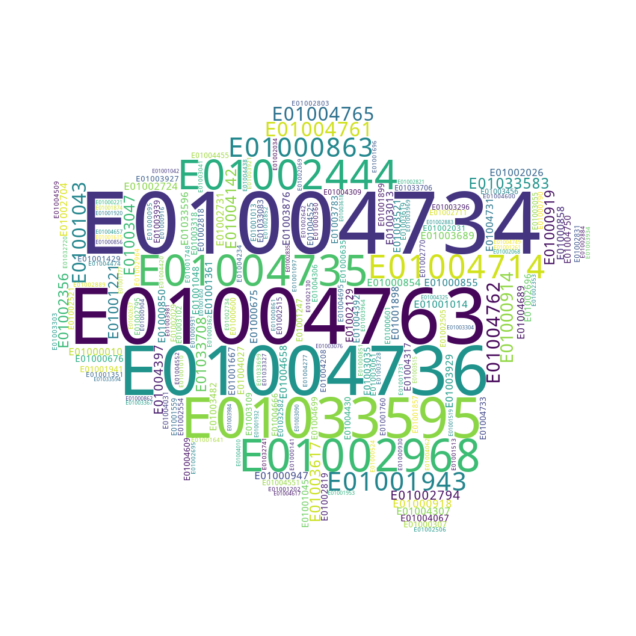

In [ ]:
# Biar bagus aja :)
lsoaCount = df.groupby('lsoa_code')
lsoaTotal = lsoaCount['value'].sum()

londonMask03WC = WordCloud(background_color='white', mask=londonMask).generate_from_frequencies(lsoaTotal)

fig = plt.figure(figsize=(8, 8))

plt.imshow(londonMask03WC, interpolation="bilinear")
plt.axis("off")
plt.show()
# Nah cakep keliatan bentuknya :)

### **Folium**

**CODE EXPLANATION**
- *`world_geo`*<br>
mengisi variable dengan url.
- *`world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='cartodb positron')`*<br>
membuat peta dengan folium, lokasi di london dengan koordinat tersebut, dengan zoom start 10 dan jenis peta  'cartodb positron'.
- *`folium.Choropleth()`*<br>
membuat peta dengan memvisualkan data. `geo_data` berguna untuk menggunakan data menjadi `world_geo`. `columns` menentukan kolom yang digunakan.  `key_on` menentukan property yang digunakan pada GeoJson.

In [ ]:
# folium borough
world_geo = 'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

# buat map
world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='cartodb positron')

folium.Choropleth(
    geo_data=world_geo,
    data=crBoroughGroupCount,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of London'
).add_to(world_map)


#world_map.save('LondonCrimeBorough.html')
world_map


In [ ]:
world_map.save('LondonCrimeBorough.html')

## **CONCLUSION**


- Kejahatan paling sering terjadi atau dilakukan adalah Theft and Handling dengan jumlah lebih dari 2,6 juta di semua wilayah dalam kurun waktu 9 tahun. Presentase terjadinya Theft and Handling mencapai 40%.
- Angka kejahatan tertinggi terjadi di tahun 2018, dan angka terrendah terjadi di 2014.
- Angka kejahatan menurun dari 2012 hingga 2014 akan tetapi naik kembali pada tahun tahun selanjutnya.
- Bulan July merupakan bulan dengan kejahatan tertinggi disusul dengan bulan Oktober, Mei, dan Maret. Bulan-bulan tersebut rata-rata merupakan bulan dimulainya musim baru.
- Westminister merupakan kota dengan angka kejahatan paling tinggi, dapat diasumsikan bahwa Wesminister cukup berbahaya untuk di tinggali.
- Kota teraman yaitu City of London dengan angka kejahatan hanya 780 dalam 9 tahun. bahkan dengan bulan dan tahun kejahatan paling banyak terjadi, kejahatan hanya terjadi sebanyak 13 kali.
- Kota Kingston upon Thames, Richmond upon Thames, dan Sutton menempati peringkat kota paling aman setelah City of London.  
- Dengan luas wilayah City of London yang kecil wajar apabila penanganan kejahatan lebih baik dengan kota lain, akan tetapi Westminister dengan area tidak begitu luas dibandingkan degaan area lainnya.
- Pada Westminister sebenarnya hanya 1 LSOA yang memiliki jumlah paling banyak, dengan begitu mungkin dapat menambah personel pada wilayah LSOA tersebut



*Folium LSOA tidak disertakan karena sangan besar filenya, ketika melakukan load LSOA GeoJSON file langsung menjadi 90MB sehingga tidak dapat di upload GitHub berikut link google drive dengan seluruh data yang lengkap*<br>
<font color = 'red'>**Link :** https://drive.google.com/drive/folders/1fIOBm9xizI2xDbH4GpxKTetaR07vftep?usp=sharing
